# Shadow Mean
Investigating the distribution of sample mean.

In [1]:
import numpy as np
import pandas as pd

### Generate Pareto Samples

In [2]:
# Settings
n = 10000000
a = 1.13  # Supposedly this is pareto 80:20, but I'm not sure I've got this right

In [3]:
# Generate Sample
s = np.random.pareto(a, n)
sample_sr = pd.Series(s)

##### Select Top 20% of Values

In [4]:
subsample_pct = 0.20
subsample_size = int(len(s)*subsample_pct) # Twenty percent of n
subsample_sr = sample_sr.sort_values(ascending=False).iloc[0:subsample_size]

If I've got pareto 80/20 the two cells below should give similar output. 

But for some reason the sum of the top 20% of values looks larger than 80% of the total sum.

In [5]:
# Show 80 Percent of the Total
print(f'Eighty Percent of Total: {np.sum(s)*0.8:,.2f}')
print(f'Largest 20 values Total: {subsample_sr.sum():,.2f}')

Eighty Percent of Total: 52,796,278.91
Largest 20 values Total: 59,302,871.26


##### Compare True Mean with Sample Mean

In [6]:
true_mean = a/(a-1)
sample_mean = sample_sr.mean()

print(f'True mean: {true_mean:,.2f}')
print(f'Sample mean: {sample_mean:,.2f}')

True mean: 8.69
Sample mean: 6.60


In [7]:
# Calculate the Cumulative Mean
cumcount = pd.Series(1).repeat(n).reset_index(drop=True).cumsum()
cummean = (sample_sr.cumsum()/cumcount)
cummean.name = 'cumulative_mean'

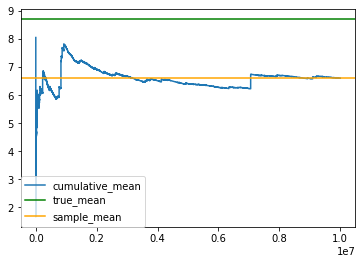

In [8]:
ax = cummean.plot()
ax.axhline(true_mean, color='green', label='true_mean')
ax.axhline(sample_mean, color='orange', label='sample_mean')
ax.legend(loc=[0,0])